In [1]:
# standard libraries
import numpy as np
import pandas as pd
import re
import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = [8, 8]

In [2]:
#Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Algorithms
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


C:\Users\Dominic Soon\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# prepre processing
# ftds_oct_2018/Projects/BeginnerDataScience/01_getting_data.ipynb
      

In [4]:
# url = 'https://github.com/ohjho/ftds_oct_2018/raw/master/Projects/BeginnerDataScience/data/centadata_clean.csv'
df = pd.read_csv('centadata_clean.csv',index_col=0)

In [5]:
# Drop some not required columns
data = df.drop(['yaxis','dateofcompletion','schoolnet','deal_age','deal_year'], axis=1)

# take out detached houses and drop the column
data = data[data.is_dettached == 0]
data = data.drop(['is_dettached'], axis=1)

In [6]:
# Changing the data categories
data['region'] = data['region'].astype('category')
data['schoolnet_en'] = data['schoolnet_en'].astype('category')
# data['txdate'] = data['txdate'].astype('datetime64')
data['txdate'] = pd.to_datetime(data['txdate'],format="%d/%m/%Y")

data.shape

(86682, 12)

In [7]:
# checking for duplicates
dup = data[data.duplicated(subset=None,keep='first').sort_values(ascending=False)]
print(len(dup))
# dup.to_csv('dups.csv', encoding='utf-8') 

# some duplicates were found despite floor being unique. We dropped the duplicates as number small
data = data.drop_duplicates()
data.shape

111


C:\Users\Dominic Soon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(86571, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86571 entries, 0 to 100699
Data columns (total 12 columns):
txdate             86571 non-null datetime64[ns]
price              86571 non-null int64
saleablearea       86571 non-null int64
buildingaddress    86571 non-null object
numberofunits      86571 non-null int64
numberoffloors     86571 non-null int64
flatsperfloor      86571 non-null int64
region             86571 non-null category
price_per_sqf      86571 non-null float64
floor_number       86571 non-null int64
building_age       86571 non-null float64
schoolnet_en       86571 non-null category
dtypes: category(2), datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 7.4+ MB


In [9]:
# re-arrange cols for better reading in EDA
data = data[['txdate','price_per_sqf','price','region','buildingaddress', 'floor_number','saleablearea', 'building_age',
             'numberofunits','numberoffloors', 'flatsperfloor','schoolnet_en']]


In [10]:
data.describe(include='all')

,txdate,price_per_sqf,price,region,buildingaddress,floor_number,saleablearea,building_age,numberofunits,numberoffloors,flatsperfloor,schoolnet_en
count,86571,86571.000000,8.657100e+04,86571,86571,86571.000000,86571.000000,86571.000000,86571.000000,86571.000000,86571.000000,86571
unique,451,NaN,NaN,56,9015,NaN,NaN,NaN,NaN,NaN,NaN,35
top,2017-04-13 00:00:00,NaN,NaN,Tseung Kwan O,51 WING SHUN STREET,NaN,NaN,NaN,NaN,NaN,NaN,Kowloon district No. 34 school network
freq,498,NaN,NaN,5130,923,NaN,NaN,NaN,NaN,NaN,NaN,6061
first,2017-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14252.470048,8.453244e+06,NaN,NaN,15.535953,556.132885,26.604427,196.110164,25.711046,7.367675,NaN
std,NaN,5487.870123,9.002943e+06,NaN,NaN,12.340890,286.966672,16.685658,142.336550,12.484665,4.173032,NaN
min,NaN,1236.954001,5.500000e+05,NaN,NaN,-2.000000,97.000000,-1.043121,1.000000,1.000000,1.000000,NaN
25%,NaN,10638.297870,4.520000e+06,NaN,NaN,6.000000,378.000000,14.203970,86.000000,15.000000,5.000000,NaN


In [11]:
data.head()

,txdate,price_per_sqf,price,region,buildingaddress,floor_number,saleablearea,building_age,numberofunits,numberoffloors,flatsperfloor,schoolnet_en
0,2017-02-16,7346.938776,2880000,Mongkok/Yaumatei,205A TUNG CHOI STREET,2,392,55.290897,8,8,1,Kowloon district No. 32 school network
1,2018-01-11,7653.061224,3000000,Mongkok/Yaumatei,205A TUNG CHOI STREET,3,392,55.290897,8,8,1,Kowloon district No. 32 school network
2,2017-06-26,26673.640170,51000000,Happy Valley/Mid Level East,4A-4B WONG NAI CHUNG GAP ROAD,5,1912,53.204654,8,8,1,Hong Kong District No. 12 school network
3,2018-03-21,14115.646260,4150000,Diamond Hill/Wong Tai Sin,98 TSEUK LUK STREET,16,294,19.871321,30,15,2,Kowloon district No. 43 school network
4,2017-11-28,9905.660377,5250000,Diamond Hill/Wong Tai Sin,54-58 SOUTH WALL ROAD,8,530,49.122519,32,9,4,Kowloon district No. 41 school network


### Simple EDA

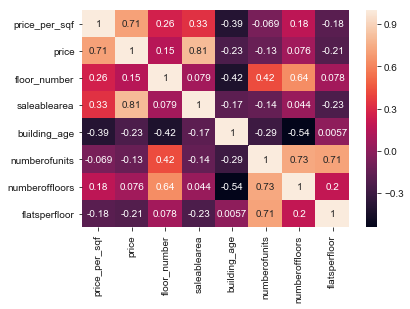

In [12]:
ax = sns.heatmap(data.corr(), annot=True)
sns.set(font_scale=10)

Observations:
* psf price weak -ve corr with building age
* psf price weak +ve corr with floor no and saleable area
* older bldgs then to have lower no of floors and no of units

Obvious stuff:
* Strong +ve corr between no of units and flats per floor and no of floors
* +ve corr between floor no and number of units and floors

== **We will need to one-hot encode to see corr/regressions between psf price and region/schoolnet** ==

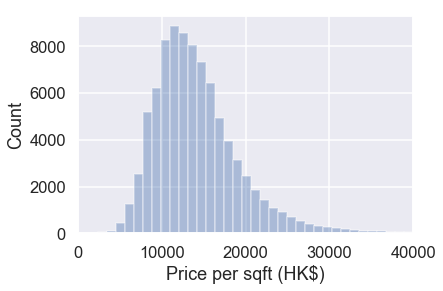

In [13]:
ax = sns.set(style = 'darkgrid', context = 'talk', font_scale= 1)
ax = sns.distplot(data['price_per_sqf'].dropna(), bins=100, label = "Price per sqft (HK$)", kde =False)
ax.set(xlabel="Price per sqft (HK$)", ylabel='Count')
ax.set_xlim(0,40000) # plot exclude outliers
plt.show()

Price psf distribution plot has right skew, but can be described as roughly normal. 

We can do some classification analysis for price ranges: <5K, 10K, 12K, 15K, 18K, 20K, 25K, 30K, 35K, >40K (10 classes). With these classes we can run Classifier models to predict based on street address, region (maybe together then separately due to collinearity among variables) amonng the other factos like saleable area, building age, floor number

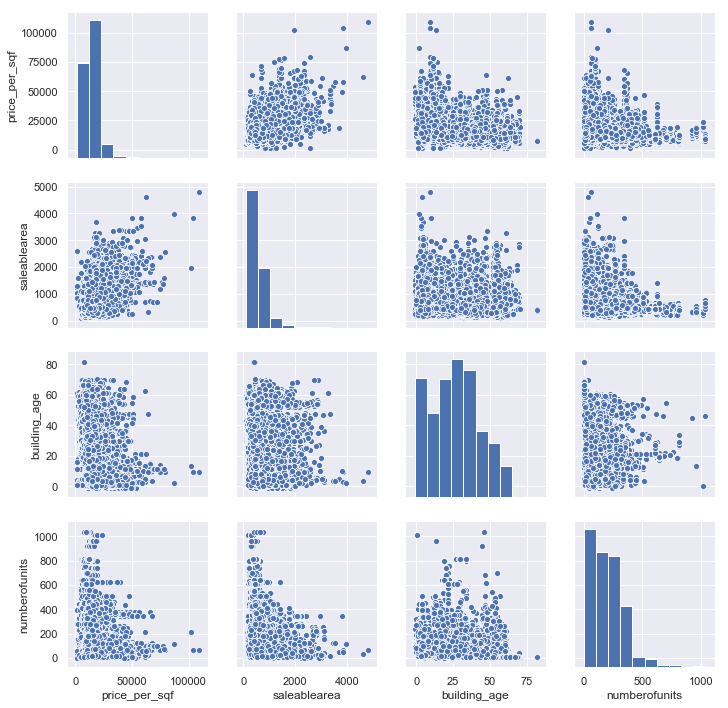

In [14]:
sns.set(style='darkgrid',context='notebook')
cols=['price_per_sqf', 'saleablearea', 'building_age','numberofunits']
sns.pairplot(data[cols])
plt.show()

Our pairplot tells similar story to heatmap of correlation. There is some +ve corr between saleable area and psf price.

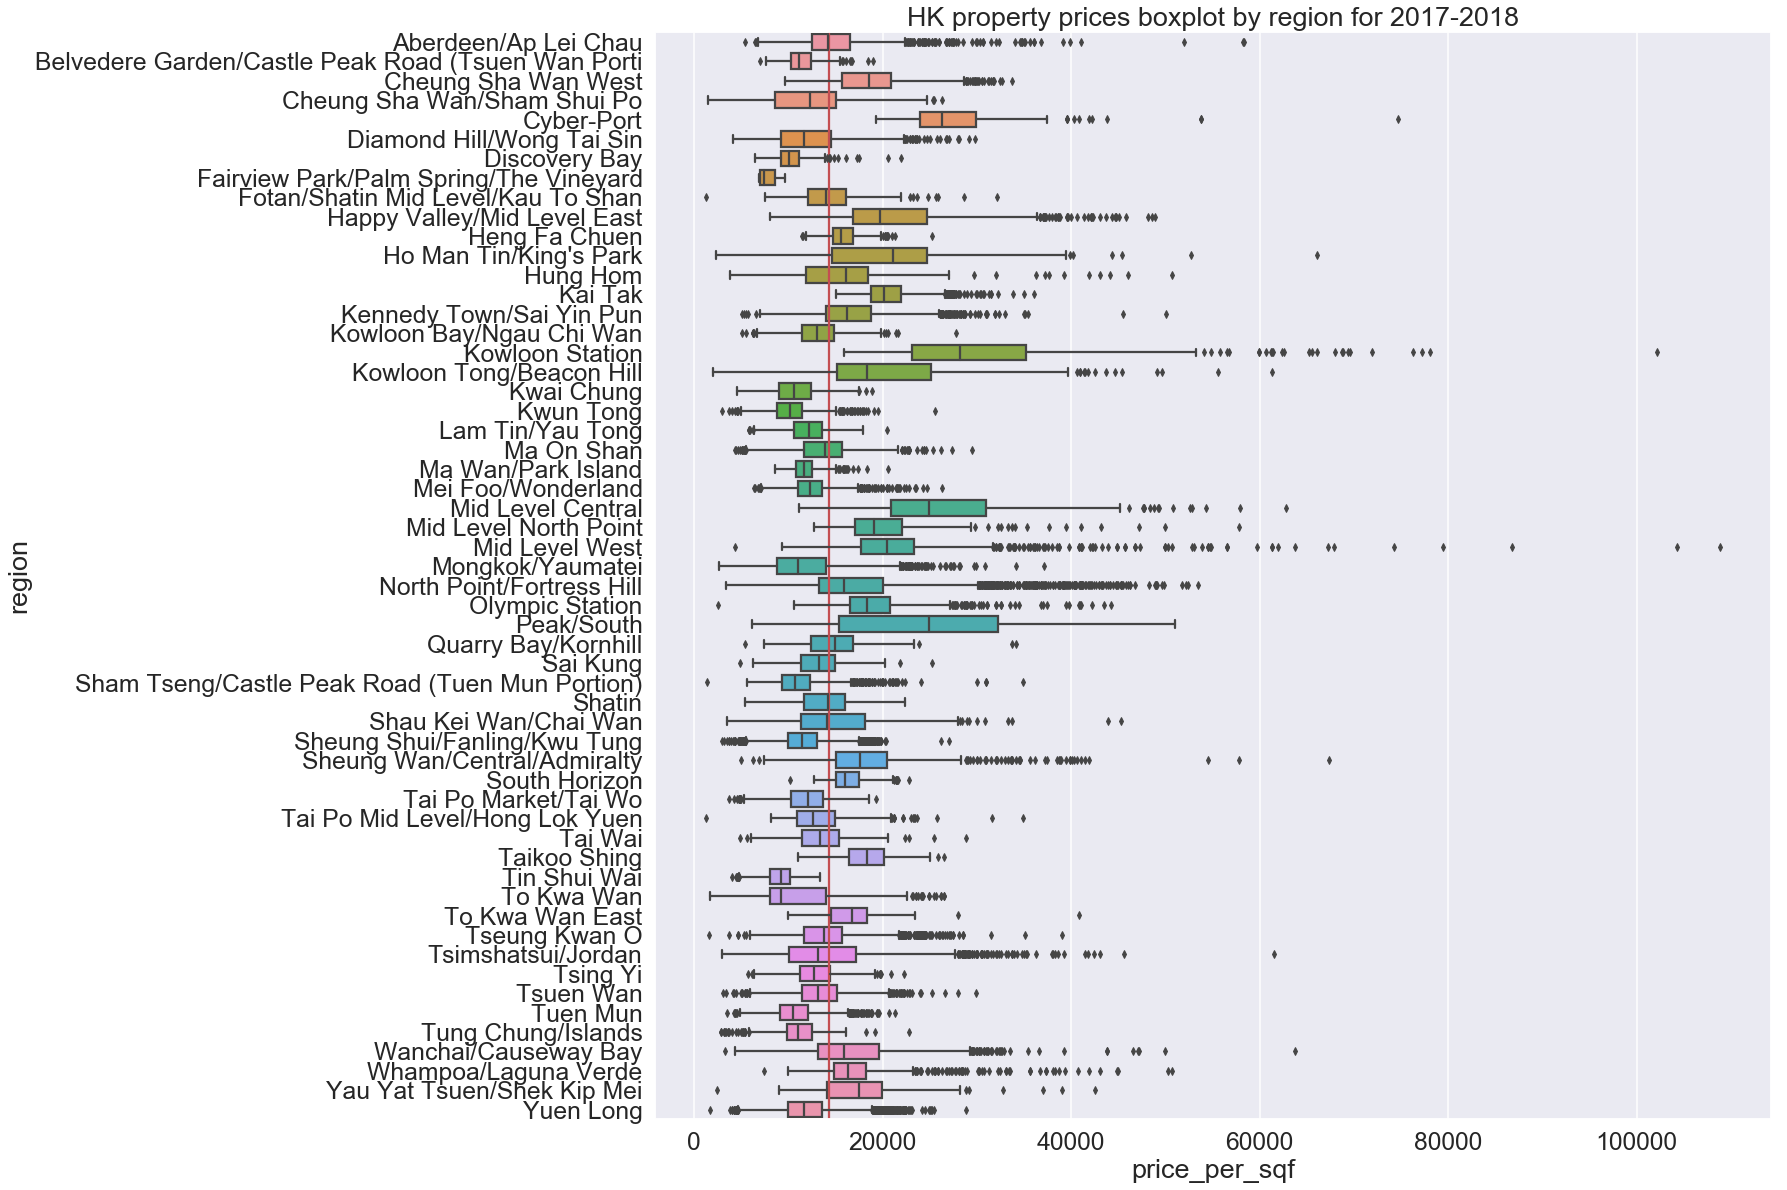

In [15]:
plt.figure(figsize = (20,20))
ax = sns.set(style = 'darkgrid', context = 'talk', font_scale= 1.5)
ax = sns.boxplot(x ='price_per_sqf', y = 'region', data = data )

mean_price = data.price_per_sqf.mean()
ax.vlines( mean_price, ax.get_ylim()[0], ax.get_ylim()[1], color = 'r')
ax.set_title('HK property prices boxplot by region for 2017-2018')
plt.show()

NB: **I manually renamed Hung Hum to Hung Hom in csv**
    It would be great if we could put the chart in median order. Checked but steps are too complicated to be worth the effort.

Observations:
* Some outliers in several region skewed the dataset a lot
* Standout more expensive areas are Kowloon Stn, Midlevels, Peak, Cyberport
* Cheaper areas are Tin Shui Wai, Fairview Park, Kwun Tong

### Feature engineered EDA

In [16]:
pct_chg_df = data.copy()

pct_chg_df.sort_values(by='txdate', inplace=True)

#new column with all dates become dd mm yyyy on day 1
pct_chg_df = pd.DataFrame(pct_chg_df.groupby(pct_chg_df['txdate'].dt.strftime('%b %Y'), sort=False)['price_per_sqf'].mean())
pct_chg_df['pct_chg'] = pct_chg_df['price_per_sqf'].pct_change()

In [17]:
pct_chg_df['indexed'] = 100*np.exp(np.nan_to_num(pct_chg_df['pct_chg'].cumsum()))

In [26]:
# from datetime import datetime
# from datetime import timedelta

# pct_chg_df['monthdates'] = datetime.strptime(str(pct_chg_df.index),'%b %Y')
# # pd.to_datetime(pct_chg_df.index,format=%m/%Y")
                                          
    

In [ ]:
ztest = 'May 2017'

zresult = datetime.strptime(ztest,'%b %Y')
zresult

In [ ]:
data['txdate'][100]

zdif = timedelta(data['txdate'][100],datetime.now())

In [19]:
pct_chg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Jan 2017 to Oct 2018
Data columns (total 3 columns):
price_per_sqf    22 non-null float64
pct_chg          21 non-null float64
indexed          22 non-null float64
dtypes: float64(3)
memory usage: 704.0+ bytes


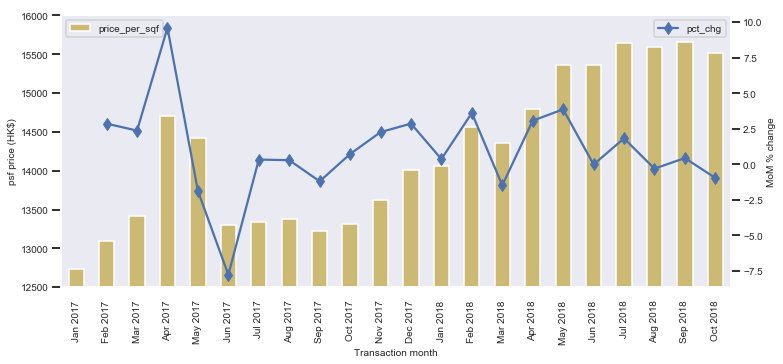

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()
pct_chg_df['price_per_sqf'].plot(kind='bar', color='y', ax=ax1)
(pct_chg_df['pct_chg']*100).plot(kind='line', marker='d', ax=ax2)

ax1.set_ylim(12500,16000)
ax1.yaxis.tick_left()
ax1.tick_params(labelsize=10)
ax1.set_ylabel("psf price (HK$)",fontsize=10)
ax1.set_xlabel("Transaction month",fontsize=10)
ax1.grid(False)
ax1.legend(loc=2, fontsize=10)
ax2.yaxis.tick_right()
ax2.tick_params(labelsize=10)
ax2.set_ylabel("MoM % change",fontsize=10)
ax2.grid(False)
ax2.legend(loc=1, fontsize=10)

plt.show()

Observation: Overall market seen steady increase in psf price since Q317 and stabilise towards Q318.

In [21]:
pct_chg_df

,price_per_sqf,pct_chg,indexed
txdate,,,
Jan 2017,12735.994656,NaN,100.000000
Feb 2017,13100.282713,0.028603,102.901603
Mar 2017,13410.503898,0.023680,105.367445
Apr 2017,14698.410404,0.096037,115.988478
May 2017,14422.408519,-0.018778,113.830806
Jun 2017,13301.126931,-0.077746,105.316215
Jul 2017,13345.171418,0.003311,105.665530
Aug 2017,13383.755725,0.002891,105.971478
Sep 2017,13223.501685,-0.011974,104.710167


### Increase dimensions and one hot encode

In [22]:
print(f"No of unique regions: {data['region'].nunique()}")
print(f"No of unique schoolnets: {data['schoolnet_en'].nunique()}")
print(f"No of unique building address: {data['buildingaddress'].nunique()}")


No of unique regions: 56
No of unique schoolnets: 35
No of unique building address: 9015


In [23]:
region_dummies = pd.get_dummies(data['region'], prefix='reg',prefix_sep='_')
region_dummies.index = data.index

In [24]:
region_dummies.shape

(86571, 56)

In [25]:
region_data = data.join(region_dummies)
region_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86571 entries, 0 to 100699
Data columns (total 68 columns):
txdate                                                    86571 non-null datetime64[ns]
price_per_sqf                                             86571 non-null float64
price                                                     86571 non-null int64
region                                                    86571 non-null category
buildingaddress                                           86571 non-null object
floor_number                                              86571 non-null int64
saleablearea                                              86571 non-null int64
building_age                                              86571 non-null float64
numberofunits                                             86571 non-null int64
numberoffloors                                            86571 non-null int64
flatsperfloor                                             86571 non-null int64
scho

In [ ]:
# one hot encode the regions for regression and need to fit transform


### Regression model training (only encoded region for now)

In [27]:
# Sperate train and test data
X = region_data.drop(['txdate','price_per_sqf','price','region','buildingaddress','schoolnet_en'], axis=1)
y = region_data['price_per_sqf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')


X_train shape (60599, 62)
X_test shape (25972, 62)
y_train shape (60599,)
y_test shape (25972,)


In [29]:
# models to run 

models = [LinearRegression(),  Lasso(alpha=1.0), XGBRegressor(random_state=1),DecisionTreeRegressor(),
          RandomForestRegressor(n_estimators=100, random_state=1), GradientBoostingRegressor()]

# redundant models:  SGDRegressor(random_state=1), Ridge(alpha=1.0), SVR()
results_cols=['Model', 'MAE','MSE','R2']
results_df = pd.DataFrame(columns=results_cols)

for lm in models:
    lm.fit(X_train, y_train)
    name = lm.__class__.__name__
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = lm.predict(X_test)
    MAE = round(mean_absolute_error(y_test, y_pred),2)
    MSE = round(mean_squared_error(y_test, y_pred),2)
    R2 = round(r2_score(y_test, y_pred) * 100 ,2)
    print(f'Mean abs error: {MAE}')
    print(f'Mean sq error: {MSE}')
    print(f'R2: {R2}%')
    
    results_entry = pd.DataFrame([[name, MAE, MSE,R2]], columns=results_cols)
    results_df = results_df.append(results_entry)


LinearRegression
****Results****
Mean abs error: 2341.76
Mean sq error: 11031099.34
R2: 63.34%
Lasso
****Results****
Mean abs error: 2341.19
Mean sq error: 11032834.5
R2: 63.33%
XGBRegressor
****Results****
Mean abs error: 2171.22
Mean sq error: 9128145.86
R2: 69.66%
DecisionTreeRegressor
****Results****
Mean abs error: 1697.46
Mean sq error: 6412767.32
R2: 78.69%
RandomForestRegressor
****Results****
Mean abs error: 1351.18
Mean sq error: 3995769.61
R2: 86.72%
GradientBoostingRegressor
****Results****
Mean abs error: 2177.49
Mean sq error: 9294182.22
R2: 69.11%


In [ ]:
results_df = results_df.set_index('Model')
results_df = results_df.sort_values(by='R2', ascending=False)
results_df

To improve models, we need to normalize psf price for the transaction date. Do we want to do it on the market MoM % change and interpolate the adjustment factor for each transaction date? E.g. we index 1/1/17 as 100 price and adjust all transaction prices against this?

In [ ]:
# looking at LM
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

lmMAE = round(mean_absolute_error(y_test, y_pred),2)
lmMSE = round(mean_squared_error(y_test, y_pred),2)
lmR2 = round(r2_score(y_test, y_pred) * 100 ,2)

# output the feature names and coefficient to see which ones are important
print(list(zip(X_train.columns.values,lm.coef_ )))

DO NOT RUN!!! Cross validation hyper parameter tuning

param_grid = { "criterion" : ["mse", "mae"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25], 
              "n_estimators": [100, 250, 500, 1000]}


from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=False, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, y_train) 

clf.best_params_

In [ ]:
# stuff models into a make pipe function include standard scalar

# NOT REQUIRED CODE (in markdown)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_region_dummies = scaler.fit_transform(region_dummies)

scaled_region_dummies[0]

pca = PCA(n_components=56)
PC_region = pca.fit_transform(scaled_region_dummies)
PC_region

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
len(cumulative_explained_variance)